In [4]:
import pandas as pd
import numpy as np
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib.finance as mpf

%matplotlib inline

In [38]:
stock_data = ts.get_k_data('600848',start='2017-01-01')

In [20]:
def calcEMA(stock_data, ma_list):
    for ma in ma_list:
        stock_data['EMA_'+str(ma)] = stock_data['close'].ewm(ignore_na=False, adjust=True, min_periods=0, span=ma).mean()        
    #return stock_data

In [21]:
def calcMACD(stock_data, short=12, long=26, M=9):
    #stock_data = calcEMA(stock_data, [short, long])
    calcEMA(stock_data, [short, long])
    stock_data['dif'] = stock_data['EMA_'+str(short)] - stock_data['EMA_'+str(long)]
    stock_data['dea'] = stock_data['dif'].ewm(ignore_na=False, adjust=True, min_periods=0, span=M).mean()
    stock_data['macd'] = 2 * (stock_data['dif'] - stock_data['dea'])

In [39]:
calcMACD(stock_data)

In [40]:
# 处理index
time_index = pd.to_datetime(stock_data['date'])
stock_data.set_index(time_index, inplace=True)

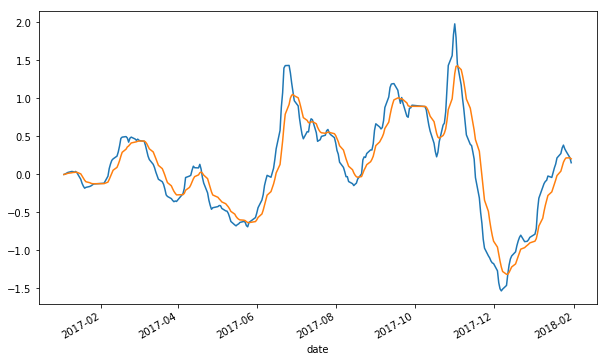

In [42]:
stock_data['dif'].plot(figsize=(10,6))
stock_data['dea'].plot()
#stock_data['macd'].plot(kind='bar').axhline(y=0, color='black', lw=2)

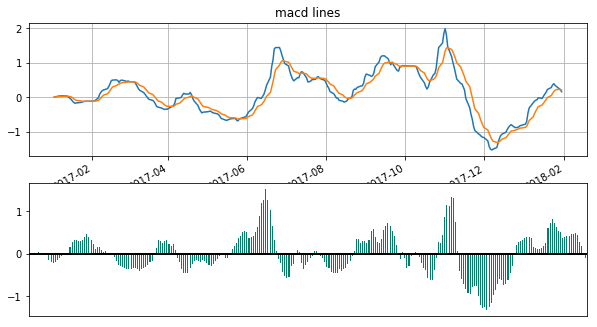

In [72]:
#stock_data['dif'].plot(figsize=(10,6))
#stock_data['dea'].plot()

df = stock_data
# 处理index
df['date'] = pd.to_datetime(df['date'])
df.set_index(df['date'], inplace=True)
fig, (ax1,ax2) = plt.subplots(2,figsize=(10,6))
df['dif'].plot(ax=ax1)
df['dea'].plot(ax=ax1)
ax1.set_title('macd lines')
ax1.grid(True)
df['macd'].plot.bar(ax=ax2,colormap='summer').axhline(y=0, color='black', lw=2)
ax2.axes.get_xaxis().set_visible(False)